In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
import seaborn as sns
sns.set_theme(font_scale=1.5, style = 'whitegrid', context= 'notebook')
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os
from matplotlib.patches import Ellipse

In [3]:
df = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\PCA\\PheNorm\\60min_Orth_Scoresx.csv')

In [4]:
df

,Label,sample,trt,trt_time,orient,spectra_num,Include,Class,Cross-validation Sets,Scores on PC 1 (8.95%),Scores on PC 2 (2.64%),Scores on PC 3 (2.64%),Scores on PC 4 (2.61%),Scores on PC 5 (2.56%),Q Residuals (80.61%),Hotelling T^2 (19.39%),Q Residuals Reduced (p=0.950) (80.61%),Hotelling T^2 Reduced (p=0.950) (19.39%),KNN Score Distance (k=3)
0,20250429,Ctrl,Ctrl,60mins,Orth,1,1,Ctrl,Leave-Out Set 1,-0.472292,-0.149665,0.003637,0.302454,-0.123074,1.499901,4.750382,0.869834,0.373536,0.311767
1,20250429,Ctrl,Ctrl,60mins,Orth,2,1,Ctrl,Leave-Out Set 2,-0.370927,-0.084748,-0.158520,0.155479,-0.132687,1.097233,2.795313,0.636315,0.219803,0.255970
2,20250429,Ctrl,Ctrl,60mins,Orth,3,1,Ctrl,Leave-Out Set 3,-0.344052,-0.089280,-0.109834,-0.024960,-0.134331,1.066005,1.795278,0.618206,0.141168,0.161715
3,20250429,Ctrl,Ctrl,60mins,Orth,4,1,Ctrl,Leave-Out Set 4,-0.377259,-0.035158,-0.219415,0.002361,-0.084917,1.197579,2.391742,0.694509,0.188069,0.235916
4,20250429,Ctrl,Ctrl,60mins,Orth,5,1,Ctrl,Leave-Out Set 5,-0.490228,-0.023866,0.002655,0.136404,-0.136480,1.983269,2.649495,1.150152,0.208337,0.250300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,20250609,Trt,Trt,60mins,Orth,5,1,Trt,Leave-Out Set 8,0.433254,-0.238247,-0.057678,-0.035196,-0.261022,1.560697,4.522614,0.905091,0.355626,0.387814
87,20250609,Trt,Trt,60mins,Orth,7,1,Trt,Leave-Out Set 9,0.544128,-0.222006,-0.434559,0.379102,0.438997,1.603587,16.208414,0.929964,1.274512,0.648596
88,20250609,Trt,Trt,60mins,Orth,9,1,Trt,Leave-Out Set 10,0.498302,-0.188631,-0.213992,0.421379,0.224838,1.761073,9.349094,1.021294,0.735145,0.502554
89,20250609,Trt,Trt,60mins,Orth,11,1,Trt,Leave-Out Set 1,0.250397,-0.212942,-0.074878,-0.213993,-0.224303,1.261887,4.055624,0.731803,0.318905,0.317470


In [5]:
df_mean = df.groupby('Class').mean(numeric_only=True)
df_mean

,Label,spectra_num,Include,Scores on PC 1 (8.95%),Scores on PC 2 (2.64%),Scores on PC 3 (2.64%),Scores on PC 4 (2.61%),Scores on PC 5 (2.56%),Q Residuals (80.61%),Hotelling T^2 (19.39%),Q Residuals Reduced (p=0.950) (80.61%),Hotelling T^2 Reduced (p=0.950) (19.39%),KNN Score Distance (k=3)
Class,,,,,,,,,,,,,
Ctrl,2.025056e+07,5.161290,1.0,-0.342575,0.000282,0.001675,0.003438,0.004941,1.143089,3.266470,0.662909,0.256852,0.275268
Trt,2.025056e+07,4.774194,1.0,0.342575,-0.000282,-0.001675,-0.003438,-0.004941,1.341383,6.572240,0.777905,0.516793,0.425059
Trt-24h,2.025056e+07,4.586207,0.0,0.058526,0.032440,-0.042861,-0.035657,-0.043668,3.718231,3.822762,2.156304,0.300594,0.323562


plt.figure(figsize = (8, 8), dpi = 150)
sns.scatterplot(
    data = df,
    x = 'Scores on PC 1 (4.94%)',
    y = 'Scores on PC 2 (3.30%)',
    hue = 'Class',
    s = 80,
    hue_order = ['Ctrl', 'Trt', 'Trt-24h'],
    alpha = .89,
    palette = ['red', 'green', 'blue'],
    edgecolor='gray'
)
#plt.figure(figsize = (8, 8), dpi = 150)
sns.scatterplot(
    data = df_mean,
    x = 'Scores on PC 1 (4.94%)',
    y = 'Scores on PC 2 (3.30%)',
    #hue = 'Class',
    s = 200,
    #hue_order = ['Ctrl', 'Trt', 'Trt-24h'],
    color = 'black',
    style='Class',
    markers = ['^', '*', 'X'],
    #alpha = .6
)

In [185]:
# Function to create confidence ellipse
def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    
    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`
    
    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    
    # Using a special case to obtain the eigenvalues of this two-dimensional dataset
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)
    
    # Calculating the standard deviation of x from the square root of the variance
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    
    # Calculating the standard deviation of y
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    
    transf = plt.matplotlib.transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)




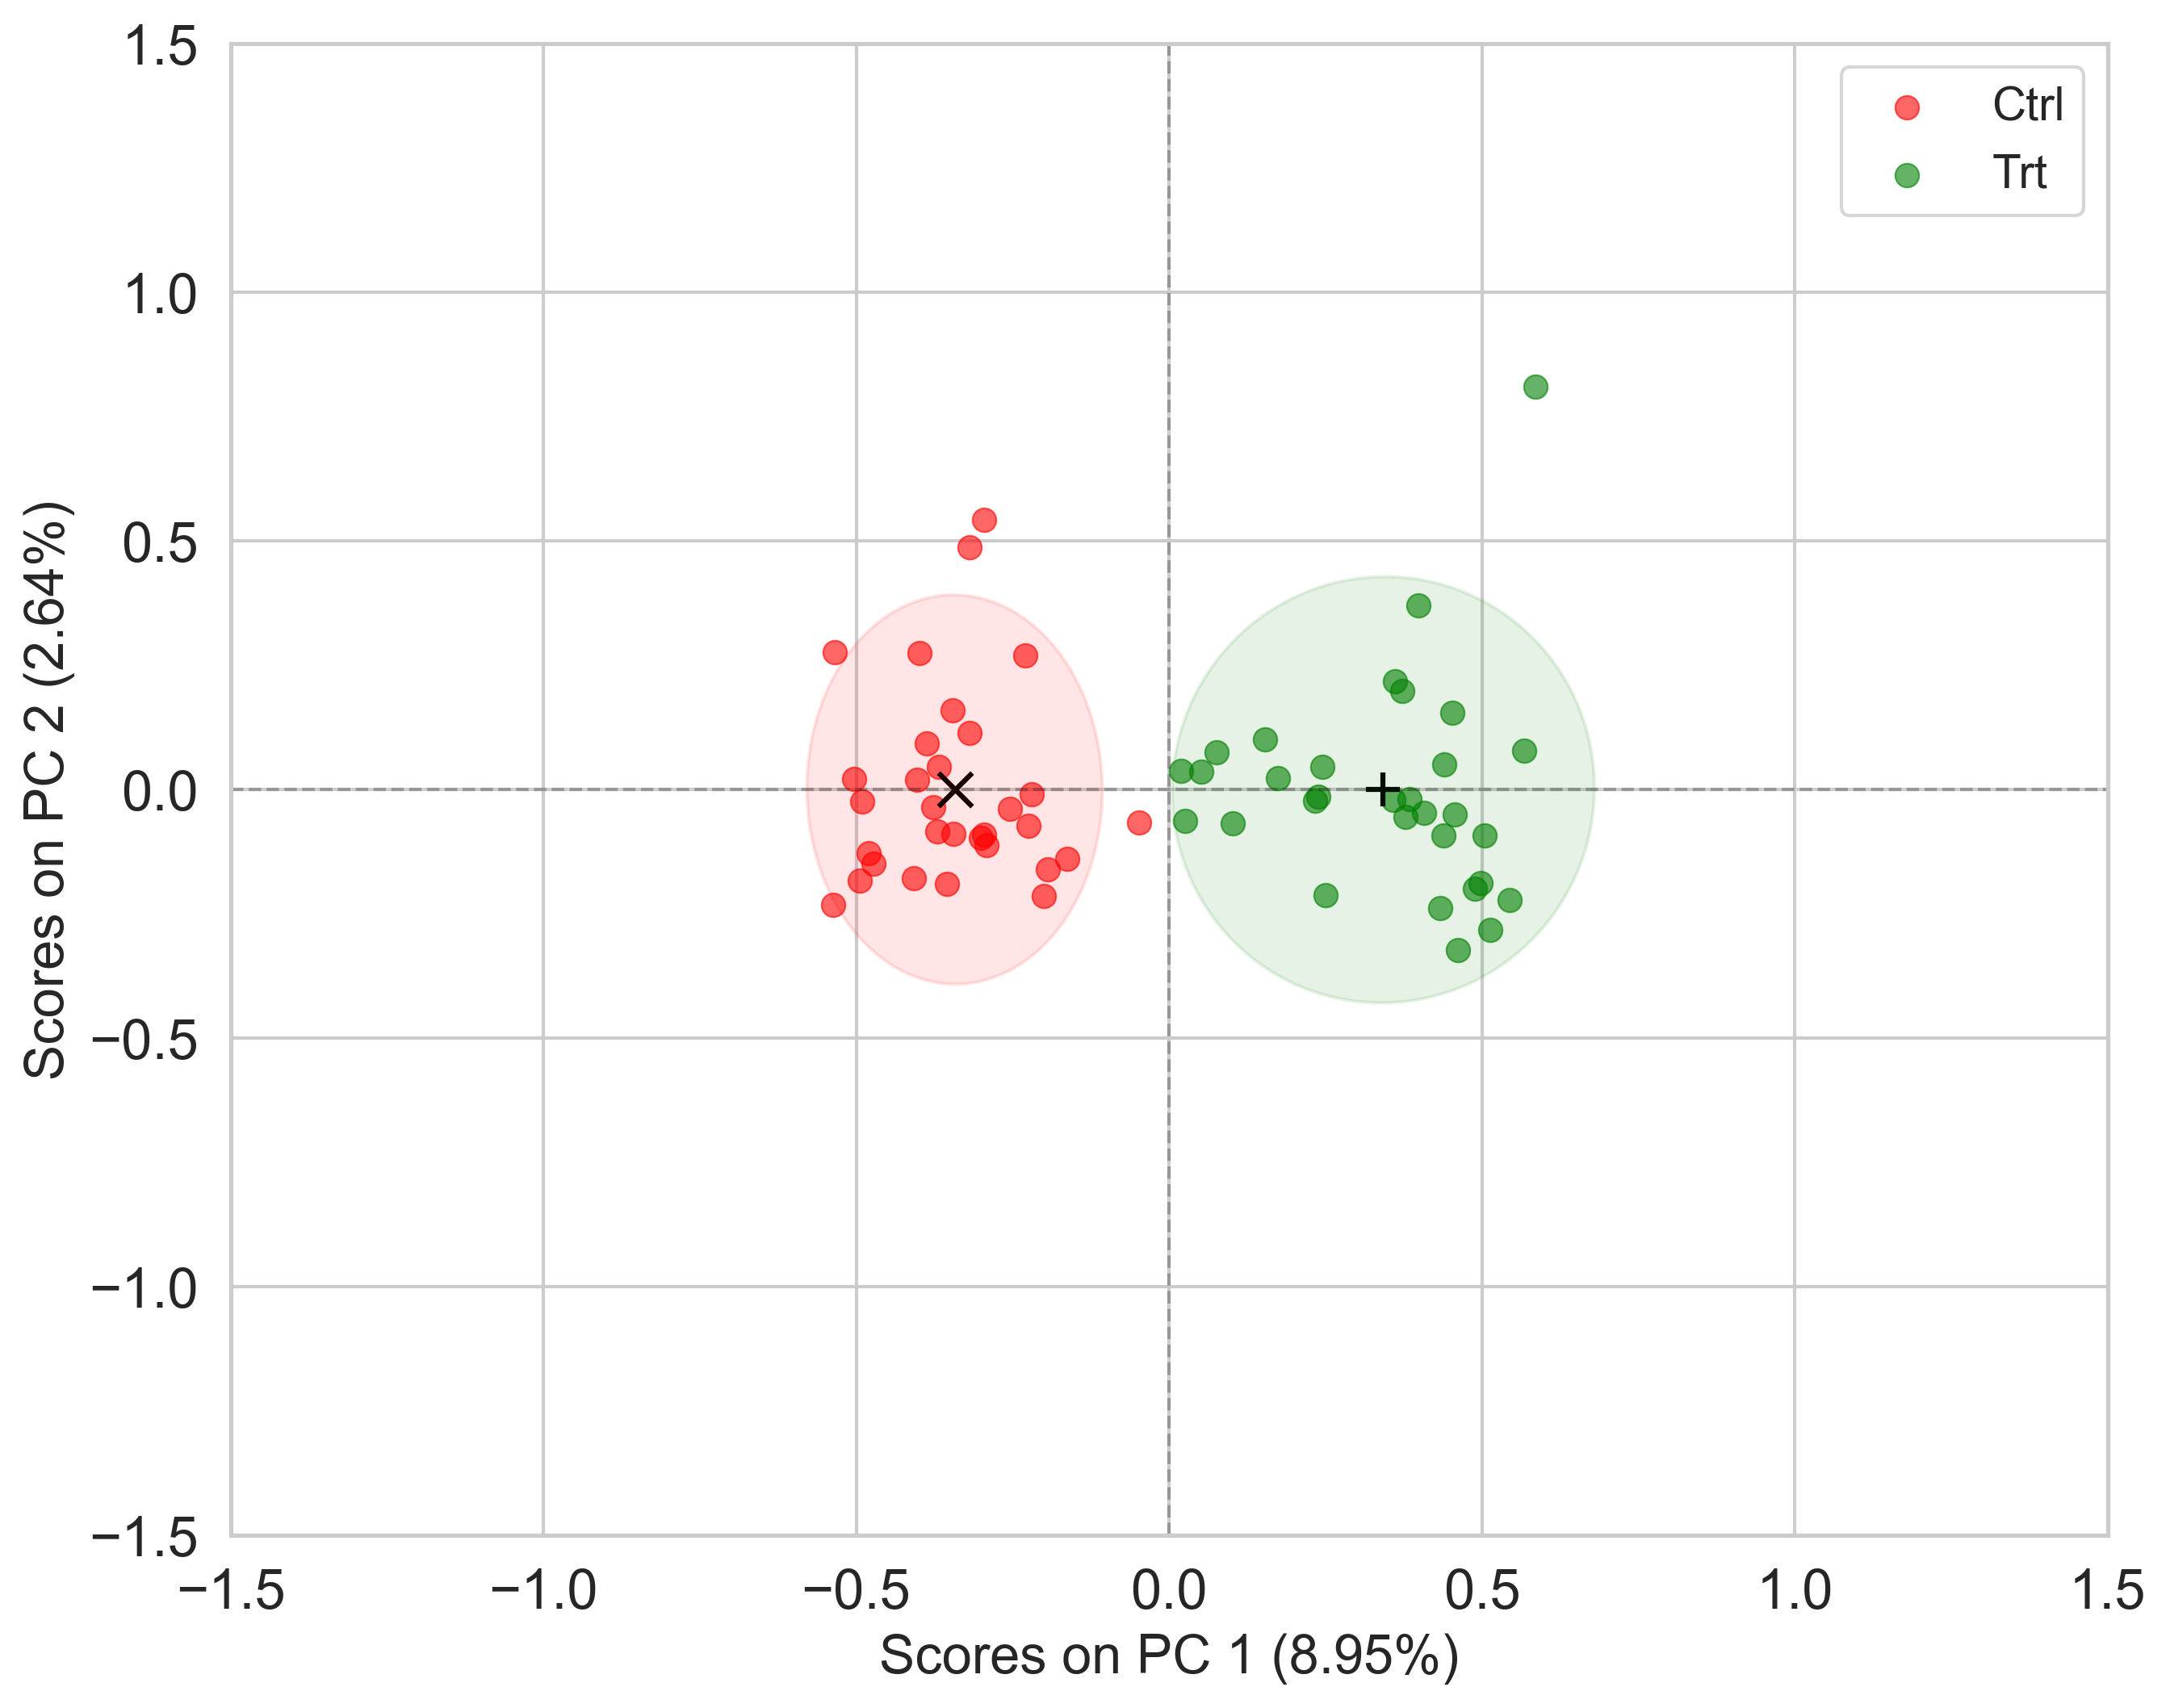

In [191]:
fig, ax = plt.subplots(figsize=(10, 8), dpi = 300)
grps = ['Ctrl', 'Trt']#, 'Trt-24h']
colors = ['red', 'green', 'blue']
markers = ['x', '+', '^']
for i in range(len(grps)):
    data = df[df['Class'] == grps[i]][['Class','Scores on PC 1 (8.95%)', 'Scores on PC 2 (2.64%)']]
    ax.scatter(data.iloc[:, 1:].values[:, 0], 
                data.iloc[:, 1:].values[:, 1],
                c=colors[i], 
                label=grps[i], 
                alpha=0.6, s=50, 
                #edgecolors='k', 
                linewidth=0.5)
    ax.scatter(
                data.iloc[:, 1:].values[:, 0].mean(), 
                data.iloc[:, 1:].values[:, 1].mean(),
                marker = markers[i],
                color = 'black',
                s=100,
    
)
    confidence_ellipse(data.iloc[:, 1:].values[:, 0], 
                        data.iloc[:, 1:].values[:, 1], 
                                ax, n_std=2, 
                            edgecolor=colors[i], 
                            linewidth=1, 
                            facecolor=colors[i], 
                            alpha=0.1)
plt.axvline(0, color = 'k', ls = '--', lw = 1, alpha = .3)
plt.axhline(0, color = 'k', ls = '--', lw = 1, alpha = .3)
ax.legend(loc='best', fontsize=14)
ax.set_xlabel(f'{data.columns[1]}', fontsize=16)
ax.set_ylabel(f'{data.columns[2]}', fontsize=16)
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
plt.show()

In [6]:
data = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\Data_Master_Sheet_Phenorm.xlsx', sheet_name='2mins_Orth')
data.head()

,exp,sample,trt,trt-time,orient,spectra-num,753.117,754.26,755.404,756.546,...,1725.16,1726.04,1726.92,1727.8,1728.68,1729.56,1730.44,1731.32,1732.2,1733.08
0,20250429,Ctrl,Ctrl,2mins,Orth,1,0.632948,0.641236,0.650037,0.659351,...,0.373141,0.370093,0.365495,0.360264,0.354827,0.349059,0.343195,0.337455,0.332725,0.330102
1,20250429,Ctrl,Ctrl,2mins,Orth,2,0.369638,0.400969,0.429757,0.455999,...,0.316936,0.318039,0.320224,0.323649,0.327942,0.332569,0.336941,0.340385,0.342241,0.342132
2,20250429,Ctrl,Ctrl,2mins,Orth,3,0.498138,0.499328,0.502070,0.506365,...,0.307868,0.322777,0.334448,0.343387,0.349061,0.351311,0.348437,0.340934,0.331773,0.320846
3,20250429,Ctrl,Ctrl,2mins,Orth,4,0.321617,0.404753,0.481346,0.551397,...,0.335874,0.317040,0.298768,0.282959,0.271163,0.264695,0.264132,0.269667,0.280593,0.296079
4,20250429,Ctrl,Ctrl,2mins,Orth,5,0.663914,0.718932,0.770345,0.818150,...,0.452609,0.449387,0.445556,0.441208,0.436307,0.430385,0.423872,0.416589,0.409198,0.402786


In [7]:
data_mean = data.groupby(['trt', 'trt-time']).mean(numeric_only=True).drop(['exp', 'spectra-num'], axis=1).reset_index()
data_mean

,trt,trt-time,753.117,754.26,755.404,756.546,757.688,758.831,759.973,761.114,...,1725.16,1726.04,1726.92,1727.8,1728.68,1729.56,1730.44,1731.32,1732.2,1733.08
0,Ctrl,2mins,0.558845,0.620496,0.675968,0.725262,0.768376,0.805313,0.836070,0.860649,...,0.384087,0.384356,0.384489,0.384683,0.385229,0.385381,0.385343,0.384796,0.383985,0.384078
1,Trt,2mins,0.562164,0.628469,0.687813,0.740198,0.785622,0.824086,0.855590,0.880134,...,0.384785,0.389566,0.394193,0.398235,0.401365,0.403503,0.404265,0.403439,0.400517,0.396298
2,Trt-24h,2mins24h,0.581576,0.641988,0.695426,0.741888,0.781374,0.813886,0.839422,0.857983,...,0.402203,0.401524,0.399232,0.398810,0.400002,0.400661,0.401706,0.402516,0.403117,0.403316


In [17]:
ldg = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\PCA\\PheNorm\\2min_Orth_Ldgs.csv')
ldg.head()

,exp,PC 1 (5.44%),PC 2 (3.89%),PC 3 (3.80%),PC 4 (3.72%),PC 5 (3.49%),Q Residuals (79.67%),Hotelling T^2 (20.33%)
0,753.117,-0.033042,0.004206,0.031280,0.000273,0.074449,0.649600,7.416947
1,754.260,-0.030278,0.007357,0.032307,0.005156,0.076889,0.418768,7.730394
2,755.404,-0.027369,0.010235,0.033190,0.009560,0.078668,0.294468,8.004948
3,756.546,-0.024315,0.012842,0.033930,0.013486,0.079788,0.243674,8.218631
4,757.688,-0.021115,0.015176,0.034527,0.016934,0.080247,0.238661,8.354015


In [9]:
ldgs = ldg.set_index('exp')

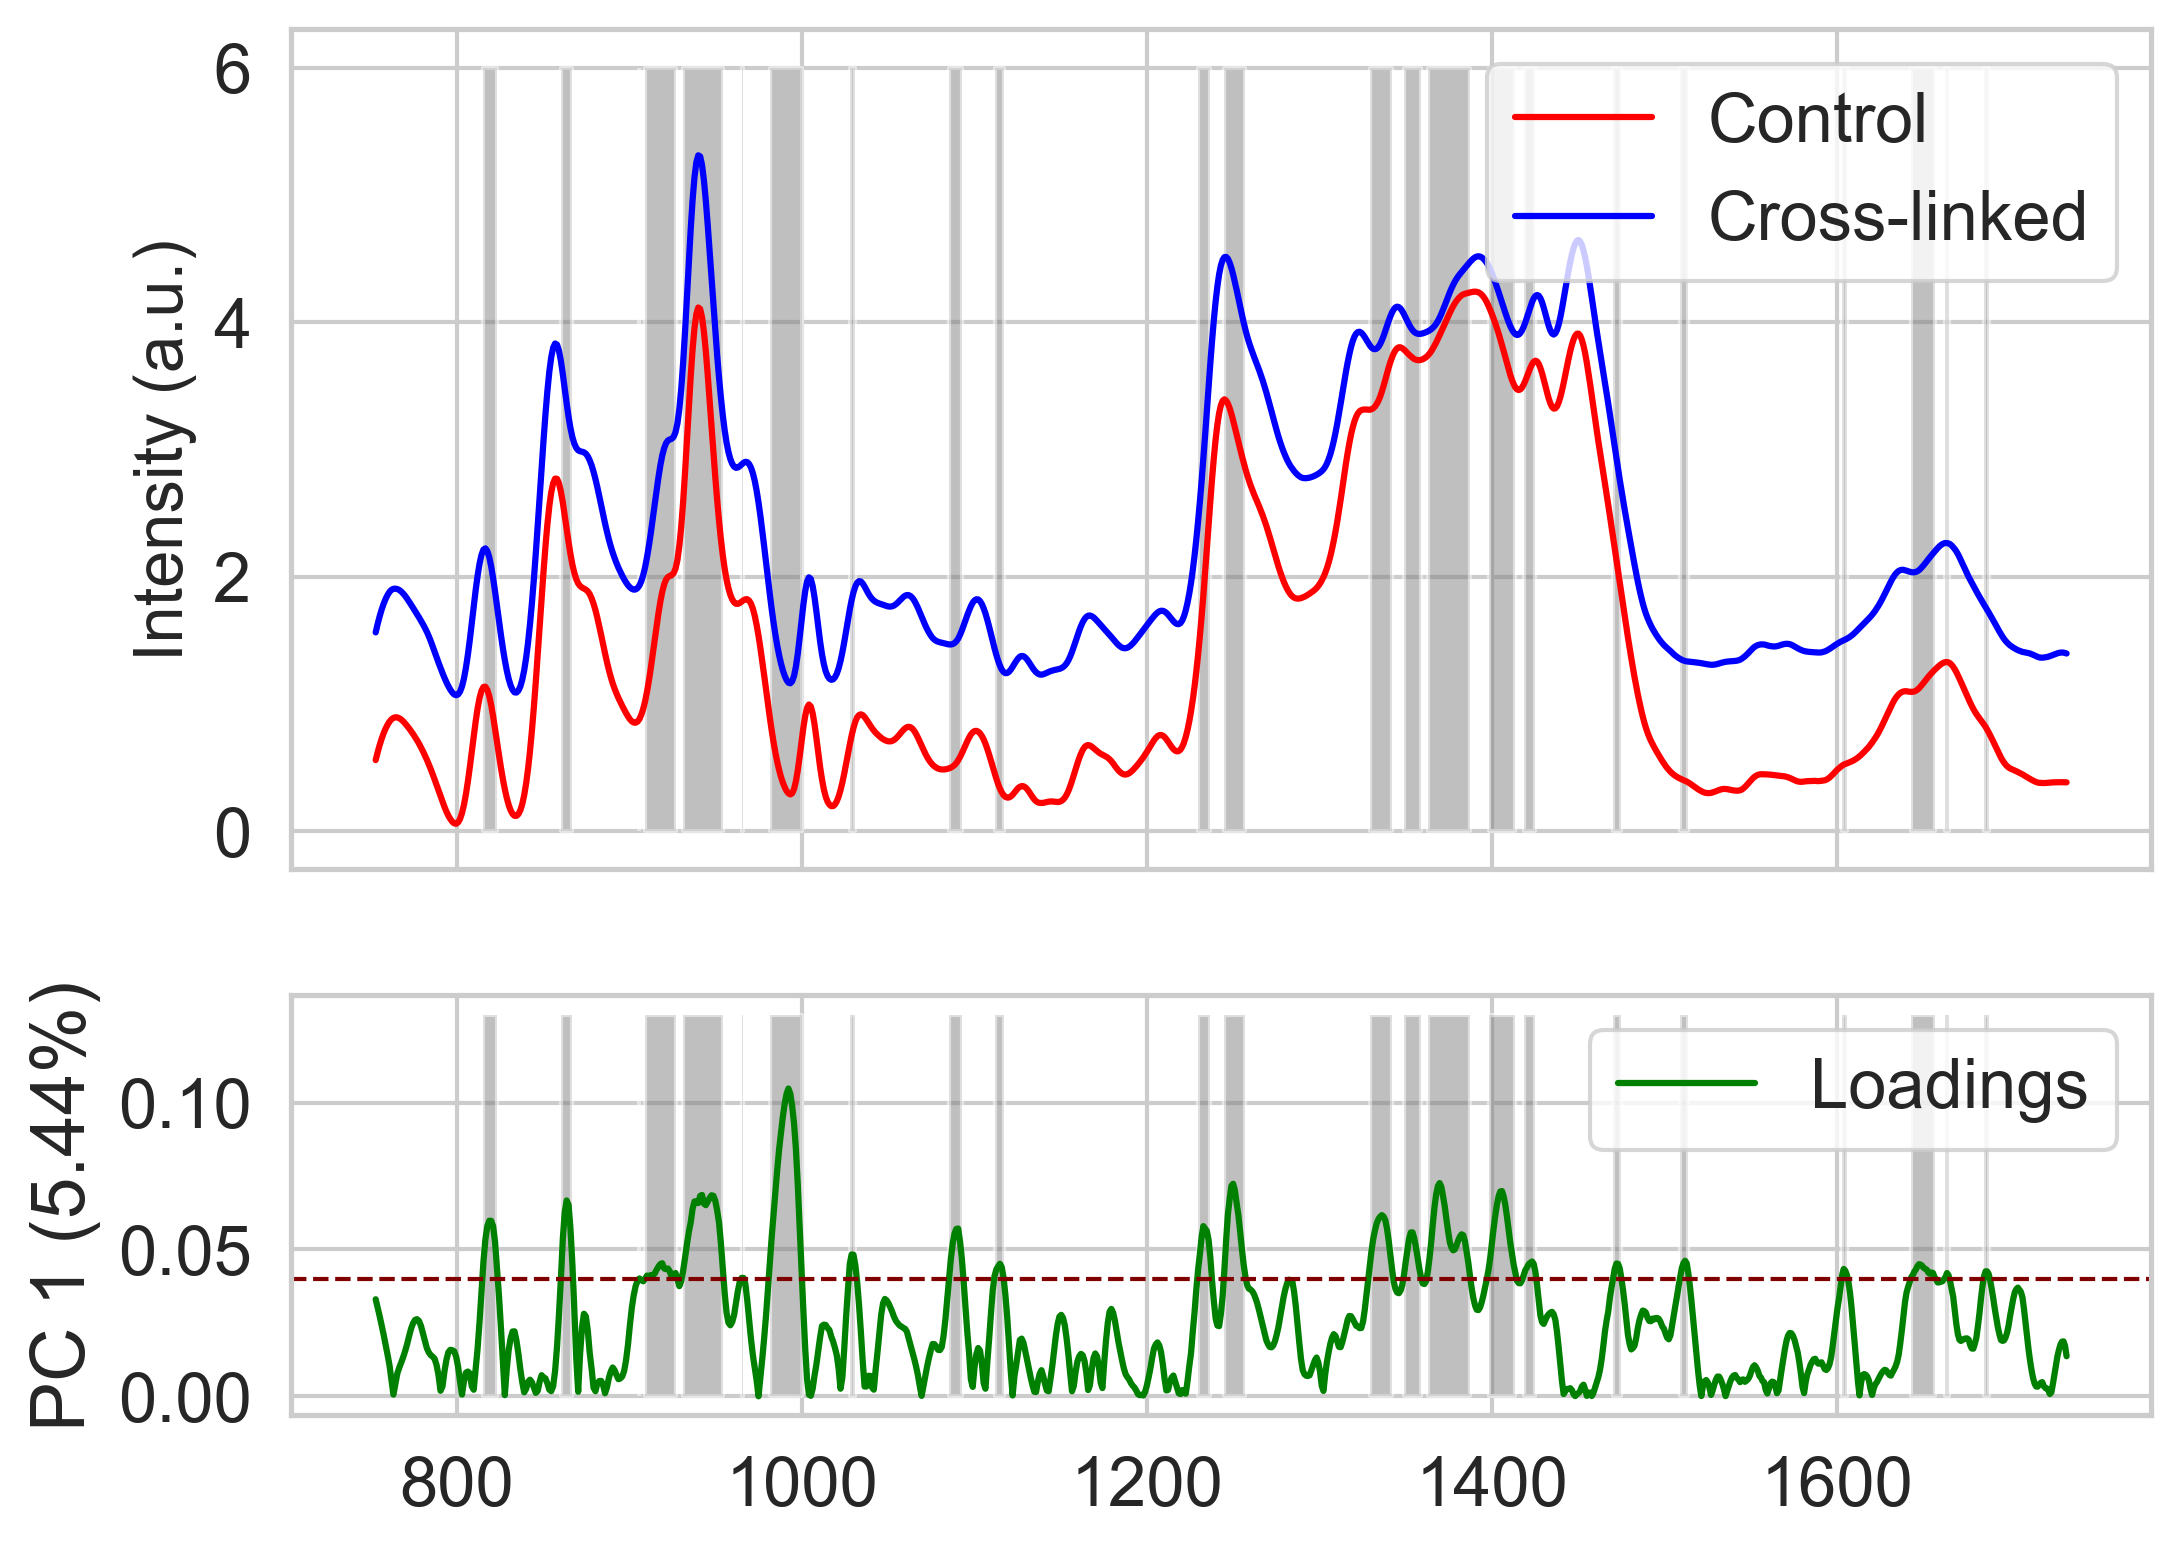

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), dpi = 300, sharex = True, gridspec_kw={'height_ratios': [2, 1]})
sns.lineplot(
    x = data_mean.columns[2:].values.astype(float),
    y = data_mean.iloc[0, 2:],
    label = 'Control',
    color = 'red',
    ax = ax[0]
)
sns.lineplot(
    x = data_mean.columns[2:].values.astype(float),
    y = data_mean.iloc[1, 2:]+1,
    label = 'Cross-linked',
    color = 'blue',
    ax  =ax[0]
)
ax[0].set_ylabel('Intensity (a.u.)', fontsize = 16)
ax[0].legend(loc = 'best')
sns.lineplot(
    x = data_mean.columns[2:].values.astype(float),
    y = np.abs(ldg['PC 1 (5.44%)']),
    label = 'Loadings',
    color = 'green',
    ax  =ax[1]
)
ax[1].axhline(0.04, #ldg['PC 1 (5.44%)'].mean(),
               color = 'maroon', ls = '--', lw = 1)
ax[1].legend(loc = 'best')
ax[1].fill_between(ldgs.index, .13, where=np.abs(ldg['PC 1 (5.44%)']) >= 0.04, facecolor='gray', alpha=.5)
ax[0].fill_between(ldgs.index, 6, where=np.abs(ldg['PC 1 (5.44%)']) >= 0.04, facecolor='gray', alpha=.5)

In [44]:
range(len(ldg['exp'])), 

(range(0, 1024),)

In [12]:
ldgs.iloc[:, 0].mean() #> 0.04

np.float64(0.007493508088386432)

In [88]:
ld = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\PCA\\PheNorm\\Loadings_VIP_colorcoded.xlsx', sheet_name='Para')
ld.index = ld['exp']
ld = ld.drop('exp', axis=1)
ld

,753.117,754.260,755.404,756.546,757.688,758.831,759.973,761.114,762.256,763.397,...,1724.280,1725.160,1726.040,1726.920,1727.800,1728.680,1729.560,1730.440,1731.320,1732.200
exp,,,,,,,,,,,,,,,,,,,,,
2mins,-0.064757,-0.037566,-0.013968,0.006035,0.022445,0.035261,0.044483,0.050112,0.050021,0.046518,...,-0.022298,-0.027105,-0.032256,-0.036049,-0.036832,-0.034401,-0.029371,-0.023417,-0.016951,-0.010766
20mins,0.082980,0.072297,0.062743,0.054317,0.047019,0.040850,0.035809,0.031896,0.031795,0.033506,...,0.025316,0.023663,0.022679,0.021803,0.021757,0.020637,0.018524,0.016460,0.015855,0.015380
40mins,0.094486,0.083924,0.073681,0.063758,0.054156,0.044873,0.035911,0.027268,0.019277,0.011625,...,0.006634,0.009542,0.013594,0.017035,0.020323,0.023439,0.025837,0.027224,0.027283,0.026979
60mins,0.058172,0.051102,0.044455,0.038230,0.032428,0.027048,0.022092,0.017558,0.011719,0.007844,...,0.049620,0.045032,0.040622,0.035833,0.031891,0.026402,0.021659,0.018288,0.016895,0.016112
24h,0.121411,0.095070,0.071889,0.051867,0.035006,0.021305,0.010764,0.003384,0.006388,0.009219,...,0.068717,0.068610,0.066301,0.061951,0.055545,0.048017,0.040198,0.033268,0.027401,0.023052


In [89]:
ld.mean(axis=1).mean()

np.float64(0.0073662213952674915)

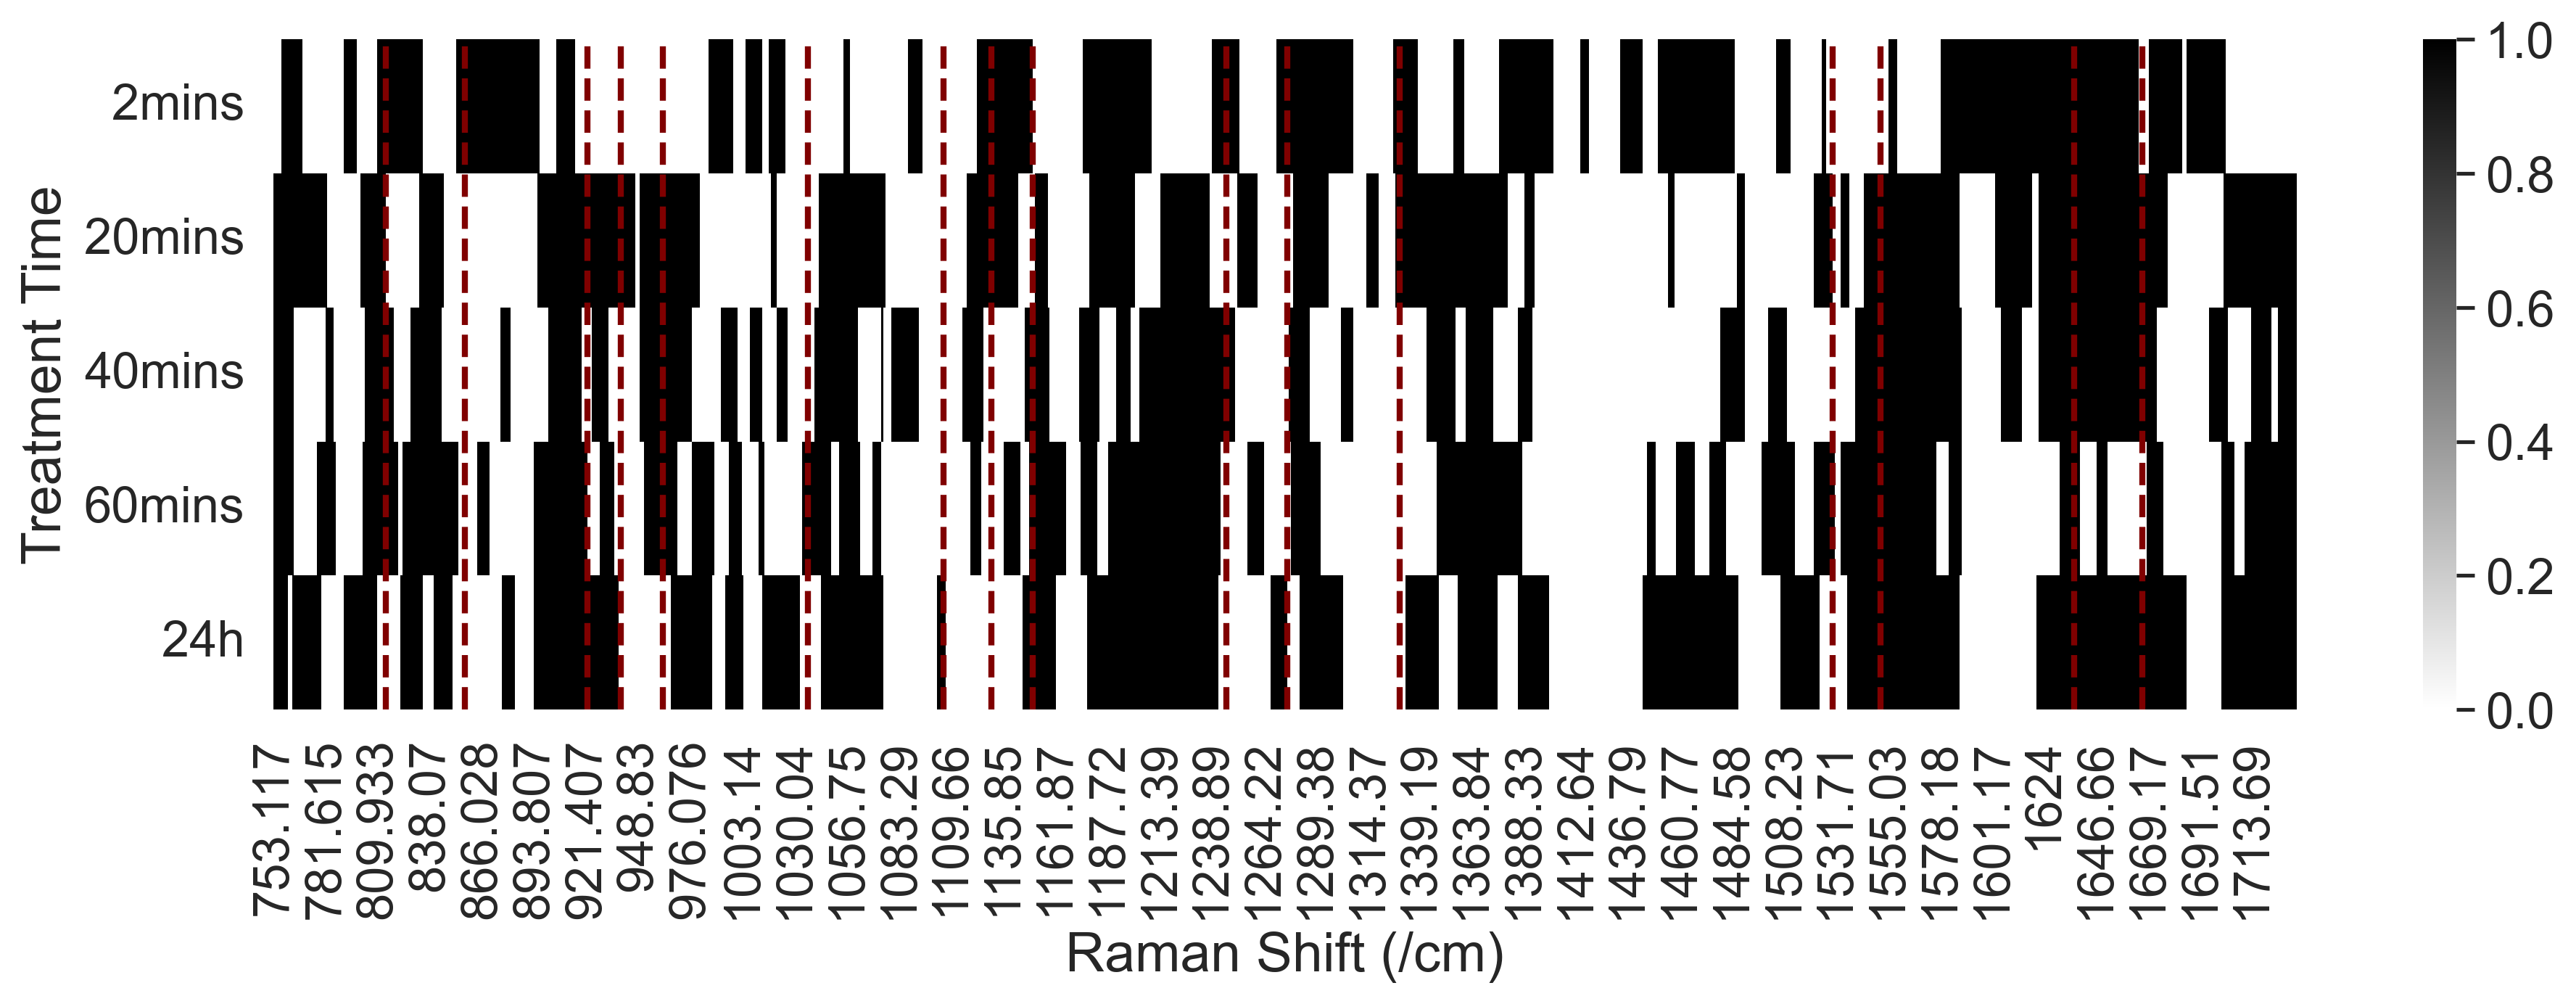

In [90]:
plt.figure(figsize=(15, 4), dpi = 300);
ax = sns.heatmap(
    data =  ld >=  ld.mean(axis=1).mean(),# 0.04,
    cmap='binary'
    );
plt.ylabel('Treatment Time');
plt.xlabel('Raman Shift (/cm)');

for x in [54, 92, 151, 167, 187, 257, 322, 345, 365, 458, 487, 541, 749, 772, 865, 898]:
    ax.axvline(x=x, color = 'maroon', lw = 2, ls = '--')
plt.show()

In [86]:
ld.columns[160:180]

Index([932.398, 933.496, 934.593,  935.69, 936.786, 937.883, 938.978, 940.075,
        941.17, 942.265,  943.36, 944.455, 945.549, 946.643, 947.737,  948.83,
       949.924, 951.016, 952.109, 953.202],
      dtype='object')